In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR


from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import plotly.express as px

sys.path.append('utils')
from modelCrafter import ModelCrafter
from funcs import separa_pontos_manual

pd.set_option('display.max_columns', None)

# **Carregando o dataset**

In [2]:
lines = pd.read_csv('../datasets/projeto_final/data.csv')

In [3]:
lines.head()

,wavenumber,intensity,j,branch,pressure,temperature,fwhm,gamma,sigma,mean_wv,std_wv,skew_wv,kurtosis_wv,max_wv,min_wv,median_wv,mean_int,std_int,skew_int,kurtosis_int,max_int,min_int,median_int
0,5683.56703,0.87873,0,R37,145,293,0.068169,0.033105,0.004739,5683.566085,0.029765,0.000005,-1.199996,5683.61693,5683.51524,5683.56608,0.567632,0.204984,0.105487,-1.423795,0.87873,0.26557,0.549450
1,5701.98259,1.23987,1,R37,145,293,0.077525,0.037694,0.005280,5701.981648,0.034114,-0.000005,-1.199997,5702.04003,5701.92327,5701.98165,0.805899,0.290988,0.084993,-1.431570,1.23987,0.37273,0.784530
2,5719.16744,1.36729,2,R37,145,293,0.080923,0.039601,0.004839,5719.166023,0.035473,0.000010,-1.200007,5719.22676,5719.10529,5719.16602,0.893575,0.319793,0.065195,-1.431605,1.36729,0.41227,0.874895
3,5735.10744,1.37998,3,R37,145,293,0.079175,0.038495,0.005394,5735.106026,0.034386,0.000023,-1.199989,5735.16488,5735.04717,5735.10603,0.903325,0.320822,0.067481,-1.428374,1.37998,0.41933,0.883840
4,5749.79130,1.32506,4,R37,145,293,0.069696,0.034073,0.004263,5749.790830,0.030580,0.000007,-1.199999,5749.84309,5749.73857,5749.79083,0.863854,0.309285,0.075582,-1.441434,1.32506,0.40452,0.846285


# **Verificando integridade dos dados**

In [4]:
lines.isna().sum()

wavenumber      0
intensity       0
j               0
branch          0
pressure        0
temperature     0
fwhm            0
gamma           0
sigma           0
mean_wv         0
std_wv          0
skew_wv         0
kurtosis_wv     0
max_wv          0
min_wv          0
median_wv       0
mean_int        0
std_int         0
skew_int        0
kurtosis_int    0
max_int         0
min_int         0
median_int      0
dtype: int64

In [5]:
lines.duplicated().sum()

0

# Continuação

In [6]:
model_pipeline = Pipeline([('preprocessor',StandardScaler())])

In [7]:
modelos = [('regressao linear',LinearRegression()),
           ('ada',AdaBoostRegressor()),
           ('gbr',GradientBoostingRegressor()),
           ('xgb',XGBRegressor()),
           ('lgbm',LGBMRegressor()),
           ('svm',SVR(kernel='poly')),
           ('ridge',Ridge()),
           ('lasso',Lasso()),
           ('knn',KNeighborsRegressor()),
           ('floresta',RandomForestRegressor(random_state = 0))]

modelcrafter = ModelCrafter()

modelcrafter.AddModel(modelos)

In [8]:
X = lines.drop(['wavenumber','intensity','j','branch','pressure','temperature','gamma','sigma','fwhm'],axis=1)

y = lines['fwhm']

In [9]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 , shuffle= True,random_state = 0)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [10]:
baseline = modelcrafter.ValidacaoCruzada(X_train,y_train,model_pipeline)

baseline.sort_values(by='mape',ascending=True)

-----regressao linear-----
-----ada-----
-----gbr-----
-----xgb-----
-----lgbm-----
-----svm-----
-----ridge-----
-----lasso-----
-----knn-----
-----floresta-----


,mae,mape,rms
regressao linear,0.006709,0.092643,0.017711
floresta,0.008181,0.096147,0.023041
ridge,0.006788,0.096334,0.018332
gbr,0.008201,0.098662,0.022310
xgb,0.008880,0.109591,0.023126
lgbm,0.012128,0.130772,0.027204
knn,0.018785,0.244488,0.026533
ada,0.018795,0.257865,0.027139
lasso,0.051288,0.654170,0.073769
svm,0.055189,0.853388,0.068963


In [11]:
model_pipeline = Pipeline([('poly',PolynomialFeatures(degree=2,interaction_only=True, include_bias=False)),('power',PowerTransformer()),('norm',StandardScaler())])
model_pipeline

Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('power', PowerTransformer()), ('norm', StandardScaler())])

In [12]:
res = modelcrafter.ValidacaoCruzada(X_train,y_train,model_pipeline)

res.sort_values(by='mape',ascending=True)

-----regressao linear-----
-----ada-----
-----gbr-----
-----xgb-----
-----lgbm-----
-----svm-----
-----ridge-----
-----lasso-----
-----knn-----
-----floresta-----


,mae,mape,rms
floresta,0.007244,0.090791,0.018218
gbr,0.008325,0.102930,0.021727
lgbm,0.010687,0.118346,0.022186
xgb,0.009227,0.118525,0.022275
ridge,0.014281,0.175356,0.036688
knn,0.017509,0.210397,0.028713
ada,0.017173,0.242726,0.024351
regressao linear,0.040521,0.374284,0.235228
lasso,0.051288,0.654170,0.073769
svm,0.057310,0.829633,0.064561


In [13]:
modelcrafter.Validacao(X_train,X_test,y_train,y_test,pipe=model_pipeline).sort_values(by='mape_teste')

-----regressao linear-----
-----ada-----
-----gbr-----
-----xgb-----
-----lgbm-----
-----svm-----
-----ridge-----
-----lasso-----
-----knn-----
-----floresta-----


,modelo,mae_treino,mae_teste,rms_treino,rms_teste,mape_treino,mape_teste
9,floresta,0.002846,0.010282,0.007902,0.033047,0.034968,0.086322
2,gbr,0.001829,0.011237,0.003046,0.034814,0.023265,0.097588
3,xgb,0.000433,0.013287,0.000620,0.037122,0.006067,0.122820
4,lgbm,0.004521,0.013250,0.011609,0.032066,0.045595,0.129826
6,ridge,0.010445,0.015338,0.019023,0.033244,0.140792,0.170670
0,regressao linear,0.005629,0.016198,0.011725,0.035742,0.080419,0.176556
8,knn,0.013521,0.018113,0.022738,0.034663,0.160416,0.202887
1,ada,0.018114,0.026132,0.021299,0.039733,0.261715,0.347876
7,lasso,0.051059,0.052032,0.074055,0.072684,0.651407,0.715834
5,svm,0.055713,0.059720,0.062148,0.067753,0.803468,0.914354


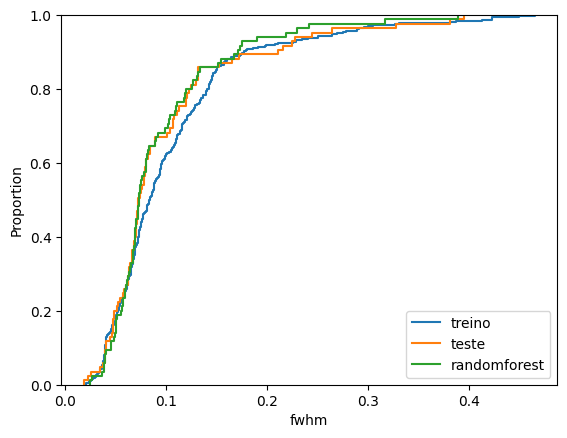

In [31]:
sns.ecdfplot(x=y_train,label='treino')
sns.ecdfplot(x=y_test, label='teste')
sns.ecdfplot(x=model_pipeline.predict(X_test),label='randomforest')
plt.legend()


In [29]:
from scipy.stats import ks_2samp
import numpy as np

# Gere duas distribuições de exemplo (substitua isso pelos seus dados reais)
distribuicao1 = y_train
distribuicao2 = y_test

# Realize o teste KS
statistic, p_value = ks_2samp(distribuicao1, distribuicao2)

# Imprima os resultados
print(f'Estatística do teste KS: {statistic}')
print(f'Valor p: {p_value}')

# Avalie a hipótese nula
alpha = 0.05
if p_value < alpha:
    print('Rejeitamos a hipótese nula. As distribuições são diferentes.')
else:
    print('Não podemos rejeitar a hipótese nula. As distribuições são semelhantes.')


Estatística do teste KS: 0.14705882352941177
Valor p: 0.09459671206267752
Não podemos rejeitar a hipótese nula. As distribuições são semelhantes.
